<a href="https://colab.research.google.com/github/MaiteMotter/Data-Science/blob/main/ProyectoDS_ParteIII_Motter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DATA SCIENCE**
### Maite Motter
### Comisión: 60905
### 2024 - CODERHOUSE


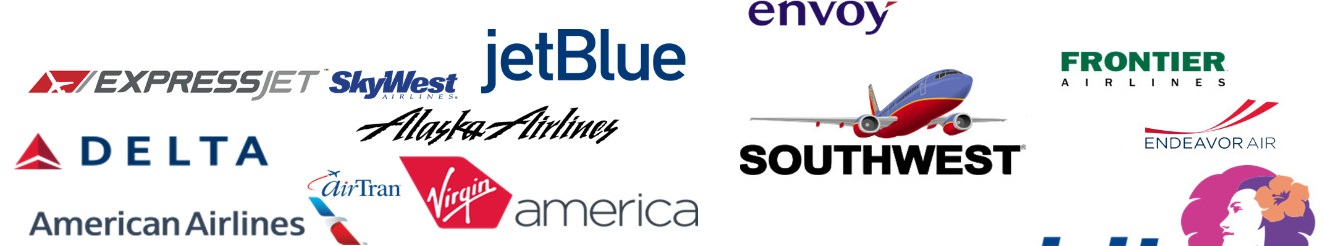

##Introducción
La evaluación de la satisfacción de los pasajeros en las aerolíneas estadounidenses es de suma importancia para la industria aérea en la gestión de la calidad del servicio. La capacidad de comprender y predecir los factores que influyen en la satisfacción del cliente permite a las aerolíneas tomar medidas proactivas para mejorar la experiencia del pasajero y mantener su competitividad en el mercado. En este contexto, el presente estudio se centra en analizar una encuesta de satisfacción de pasajeros de aerolíneas estadounidenses y en la construcción de un modelo predictivo que permita identificar los principales determinantes de la satisfacción del cliente.

## Descripción del Problema

La satisfacción de los pasajeros en las aerolíneas estadounidenses es un aspecto fundamental para la industria de la aviación, ya que influye directamente en la reputación de las compañías y su competitividad en el mercado. Identificar los factores que contribuyen a la satisfacción del cliente y comprender cómo estos afectan la percepción global del servicio es esencial para las aerolíneas en la mejora continua de su calidad y la retención de clientes. En este contexto, el análisis de la encuesta de satisfacción de pasajeros de aerolíneas estadounidenses y la identificación de tendencias y patrones en los datos pueden proporcionar información valiosa para abordar áreas de mejora específicas y optimizar la experiencia del cliente, lo que a su vez puede conducir a una mayor fidelización de los pasajeros y un aumento de la rentabilidad para las aerolíneas.

## Objetivo

El objetivo principal de este estudio es desarrollar un modelo predictivo que pueda identificar los principales factores que influyen en la satisfacción de los pasajeros de aerolíneas estadounidenses. Para alcanzar este objetivo, se llevará a cabo un análisis exhaustivo de la encuesta de satisfacción de los pasajeros, con el fin de comprender en profundidad las variables y tendencias presentes en los datos. Además, se procederá a la construcción y evaluación de modelos predictivos que permitan predecir la satisfacción del cliente en función de diferentes atributos, con el propósito de proporcionar a las aerolíneas estadounidenses valiosas oportunidades para mejorar la calidad de su servicio y la experiencia del pasajero.

## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/johndddddd/customer-satisfaction/data

Este conjunto de datos ofrece una visión completa de la satisfacción de los pasajeros en las aerolíneas estadounidenses, abarcando una amplia gama de variables que incluyen la evaluación de servicios a bordo, comodidades ofrecidas, facilidades de reserva, así como datos demográficos como la edad y el género de los pasajeros. Estos atributos detallados proporcionan una base sólida para realizar un análisis exhaustivo y construir un modelo predictivo que pueda identificar los factores clave que influyen en la satisfacción del cliente. La diversidad de información contenida en este conjunto de datos permite una exploración profunda de las experiencias de los pasajeros y la posibilidad de desarrollar estrategias efectivas para mejorar la calidad del servicio y optimizar la experiencia del viajero en las aerolíneas estadounidenses.

## Análisis Exploratorio


### Importación de Librerías y Carga de Datos

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import xlrd

In [141]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_excel('/content/drive/MyDrive/datasets/satisfaction.xlsx')
df.head(2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0


### Análisis del Dataset

En esta sección, se explorará el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

El conjunto de datos contiene un total de 129880 filas (registros) y 24 columnas (1 de identificación ID y 23 de variables).

Se observa que una de las columnas tiene valores faltantes (non-null count menor que el número total de filas). Estos valores faltantes pueden requerir un manejo especial durante el preprocesamiento de datos.

### Descripición de las variables analizadas en la Encuesta de Satisfacción

Descripción de las variables consideradas en la encuesta de satisfacción:

1. **Satisfacción:** Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)
2. **Edad:** La edad real de los pasajeros.
3. **Género:** Género de los pasajeros (Mujer, Hombre)
4. **Tipo de cliente:** El tipo de cliente (cliente leal, cliente no leal)
5. **Tipo de Viaje:** Objeto del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)
6. **Clase de viaje** en el avión de los pasajeros (Business, Eco, Eco Plus)
7. **Distancia de vuelo:** La distancia de vuelo de este viaje.
8. **Comida y bebida:** Nivel de satisfacción de Comida y bebida
9. **Comodidad del asiento:** Nivel de satisfacción con la comodidad del asiento
10. **Servicio wifi a bordo:** Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5)
11. **Entretenimiento a bordo:** Nivel de satisfacción del entretenimiento a bordo
12. **Servicio de descanso para piernas:** Nivel de satisfacción del servicio de descanso para las piernas
13. **Servicio a bordo:** Nivel de satisfacción del servicio a bordo.
14. **Limpieza:** Nivel de satisfacción de la limpieza.
15. **Facilidad de reserva en línea:** Nivel de satisfacción de la reserva en línea
16. **Soporte en línea:** Nivel de satisfacción del soporte online
17. **Embarque online:** Nivel de satisfacción del embarque online
18. **Servicio de Check-in:** Nivel de satisfacción del servicio de Check-in
19. **Ubicación de la puerta:** Nivel de satisfacción con la ubicación de la puerta
20. **Hora de salida/llegada prevista:** Nivel de satisfacción de la hora de salida/llegada conveniente
21. **Manejo de equipaje:** Nivel de satisfacción en el manejo de equipaje
22. **Retraso de salida en minutos:** Minutos de retraso a la salida
23. **Retraso de llegada en minutos:** Minutos de retraso cuando llega


### Variables potencialmente relevantes para el análisis de mercado

A continuación se analizan algunas variables que podrían ser relevantes para predecir  los principales factores que influyen en la satisfacción de los pasajeros de aerolíneas estadounidenses.


In [29]:
df[['Age', 'Gender', 'Inflight wifi service', 'Ease of Online booking', 'Baggage handling', 'Checkin service']].describe()



,Age,Inflight wifi service,Ease of Online booking,Baggage handling,Checkin service
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,3.249130,3.472105,3.695673,3.340807
std,15.119360,1.318818,1.305560,1.156483,1.260582
min,7.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,2.000000,2.000000,3.000000,3.000000
50%,40.000000,3.000000,4.000000,4.000000,3.000000
75%,51.000000,4.000000,5.000000,5.000000,4.000000
max,85.000000,5.000000,5.000000,5.000000,5.000000


Estos son los resultados de un análisis descriptivo para varias variables.

**Age (Edad):** La edad promedio de los pasajeros en el conjunto de datos es de aproximadamente 39 años. La desviación estándar de la edad es aproximadamente 15.12 años, lo que indica una dispersión moderada alrededor de la media. La edad mínima registrada es de 7 años y la máxima es de 85 años.  

**Inflight wifi service (Servicio wifi a bordo):** El nivel promedio de satisfacción del servicio wifi a bordo es de aproximadamente 3.25, con una desviación estándar de aproximadamente 1.32. El valor mínimo registrado es 0 (posiblemente indicando un servicio no disponible o muy insatisfactorio), mientras que el valor máximo es 5 (muy satisfecho).

**Ease of Online booking (Facilidad de reserva en línea):** La facilidad promedio de reserva en línea es de aproximadamente 3.47, con una desviación estándar de aproximadamente 1.31. La puntuación mínima es 0 (posiblemente indicando una dificultad extrema para reservar en línea) y la máxima es 5 (muy fácil de reservar en línea).

**Baggage handling (Manejo de equipaje):** La calificación promedio del manejo de equipaje es de aproximadamente 3.70, con una desviación estándar de aproximadamente 1.16. La puntuación mínima es 1 (posiblemente indicando un manejo deficiente o problemas con el equipaje) y la máxima es 5 (manejo de equipaje excelente).

**Checkin service (Servicio de check-in):** El nivel promedio de satisfacción del servicio de check-in es de aproximadamente 3.34, con una desviación estándar de aproximadamente 1.26. La puntuación mínima es 0 (posiblemente indicando un servicio muy insatisfactorio) y la máxima es 5 (muy satisfecho con el servicio de check-in).

Estas estadísticas proporcionan una idea general de la distribución y variabilidad de cada dimensión analizada dentro del conjunto de datos, lo que puede ayudar a identificar áreas de mejora que estamos buscando.

## Preguntas de relevancia e Hipótesis planteadas

**1.** ¿Existe una relación entre la edad de los pasajeros y su nivel de satisfacción con el servicio de wifi a bordo?

*Hipótesis 1:* Los pasajeros más jóvenes podrían estar más satisfechos con el servicio de wifi a bordo en comparación con los pasajeros de mayor edad.

**2.** ¿Existe una relación entre la distancia del vuelo y la satisfacción con el servicio de entretenimiento a bordo?

*Hipótesis 2:* Los pasajeros en vuelos de larga distancia podrían mostrar una mayor satisfacción con el servicio de entretenimiento a bordo en comparación con los pasajeros en vuelos de corta distancia.

###Análisis por género y edad de los pasajeros

In [30]:
print('Las posibles categorías de género son:', df['Gender'].value_counts())


Las posibles categorías de género son: Gender
Female    65899
Male      63981
Name: count, dtype: int64


Este análisis descriptivo inicial revela que de los 129,880 pasajeros analizados, la muestra parece ser sólida ya que hay una distribución equitativa entre mujeres y hombres. Con 65,899 mujeres y 63,981 hombres, los datos muestran una representación balanceada de género en la muestra, lo que sugiere que las conclusiones extraídas de este análisis pueden considerarse confiables y representativas de la población de pasajeros de aerolíneas estadounidenses.

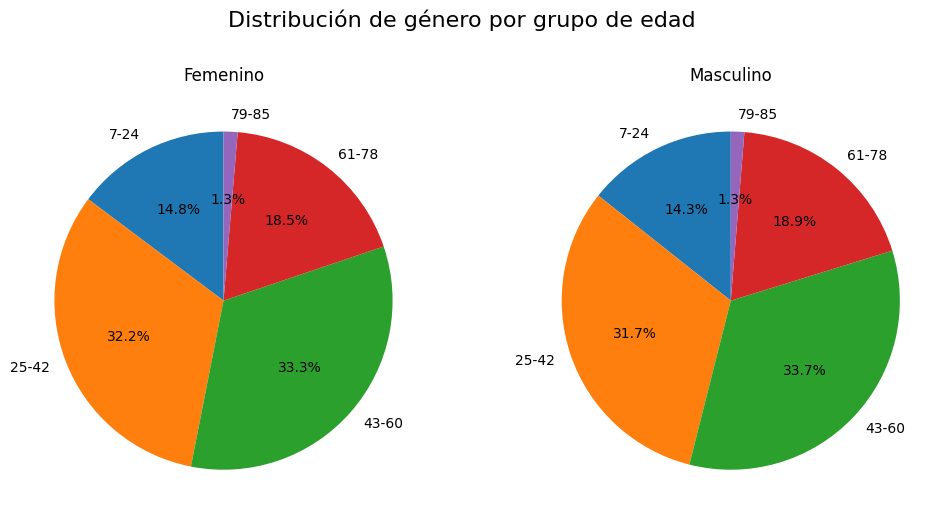

In [31]:
# Defino los límites de los grupos de edad
age_bins = np.linspace(7, 85, 6)

# Elaboro las etiquetas para los grupos de edad
age_labels = ['7-24', '25-42', '43-60', '61-78', '79-85']

# Creo una nueva columna en el DataFrame para el grupo de edad
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Agrupo por género y grupo de edad y cuento el número de pasajeros en cada combinación
gender_age_counts = df.groupby(['Gender', 'Age Group']).size().unstack(fill_value=0)

# Obtengo etiquetas de los grupos de edad
labels = gender_age_counts.columns

# Creo un gráfico de torta para cada género
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Cambio las etiquetas de género a español
labels_genero = ['Femenino', 'Masculino']

for i, (gender, counts) in enumerate(gender_age_counts.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(labels_genero[i])  # Cambio del título del género a español

# Cambio el título principal a español
plt.suptitle('Distribución de género por grupo de edad', fontsize=16)

# Muestro el gráfico
plt.show()


El análisis del gráfico nos ayuda a comprender cómo se distribuyen los géneros en diferentes grupos de edad, lo que puede proporcionar información útil sobre la demografía de los pasajeros y ayudar en la toma de decisiones relacionadas con el marketing, el servicio al cliente y otras áreas.

En terminos generales, se puede observar comparativamente que entre los distintos rangos etarios seleccionados la tendencia entre géneros es equitativa, osbservandose una preponderancia etaria entre los pasajeros de 25 a 60 años para ambos géneros.

###Relación entre la edad de los pasajeros y su nivel de satisfacción con el servicio de wifi a bordo

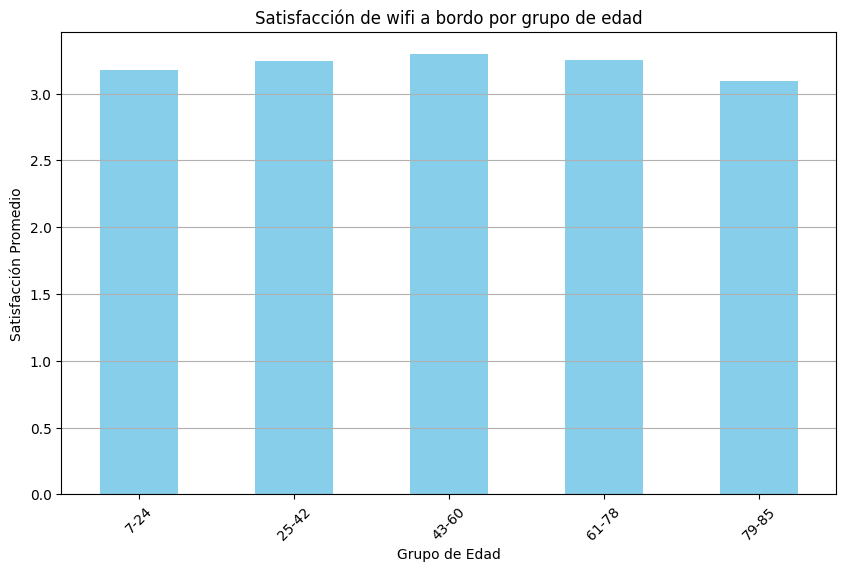

In [32]:
# Defino los límites de los grupos de edad
age_bins = np.linspace(7, 85, 6)

# Elaboro las etiquetas para los grupos de edad
age_labels = ['7-24', '25-42', '43-60', '61-78', '79-85']

# Creo una nueva columna en el DataFrame para el grupo de edad
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Filtro los datos por valores de Inflight wifi service y la nueva columna de grupo de edad
filtered_df = df[(df['Inflight wifi service'] >= 0)]

# Calculo los promedios de satisfacción del wifi a bordo para cada grupo de edad
wifi_satisfaction_by_age = filtered_df.groupby('Age Group')['Inflight wifi service'].mean()

# Creo un gráfico de barras
plt.figure(figsize=(10, 6))
wifi_satisfaction_by_age.plot(kind='bar', color='skyblue')
plt.title('Satisfacción de wifi a bordo por grupo de edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Satisfacción Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Basándonos en el gráfico de barras que muestra la satisfacción promedio del servicio wifi a bordo por grupo de edad, se puede observar que en general, parece haber una tendencia positiva en la satisfacción con el servicio wifi a bordo a medida que aumenta la edad. Los grupos de edad más avanzada tienden a mostrar una satisfacción ligeramente mayor en comparación con los grupos de edad más jóvenes.

El análisis también sugiere la importancia de considerar otros factores y segmentos de la población para comprender completamente las necesidades y preferencias de los pasajeros en relación con este servicio, como puede ser el motivo del viaje del pasajero (Viaje Personal vs Viaje de Negocios). Esto puede proporcionar información valiosa sobre áreas de mejora en la prestación del servicio wifi a bordo, como ajustes en la calidad de la conexión, la facilidad de uso o la disponibilidad del servicio en diferentes tipos de vuelos.

###Relación entre la distancia del vuelo y la satisfacción con el servicio de entretenimiento a bordo



Para comprender la relación entre las variables distancia del vuelo y satisfacción con el entretenimiento a bordo, resulta pertinente realizar un análisis detallado a través de un gráfico de dispersión. Esto nos permitirá identificar cualquier patrón o tendencia que pueda existir entre estas dos variables.

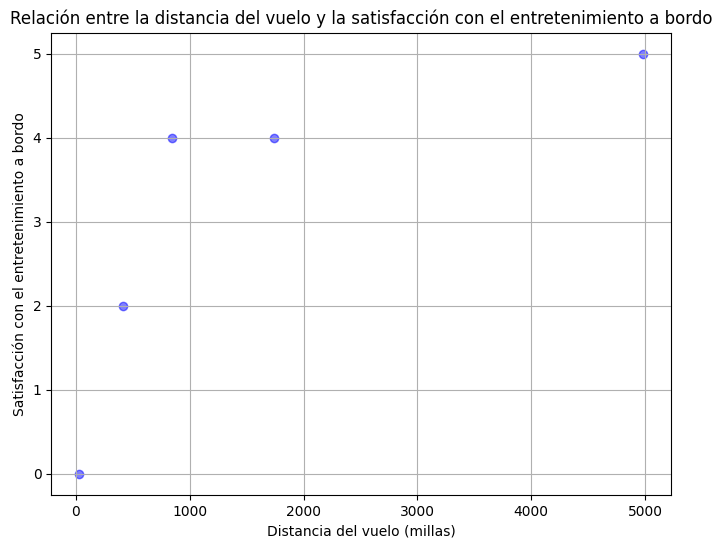

In [33]:
# Extraigo datos de distancia de vuelo y satisfacción con el entretenimiento a bordo
flight_distance = [31, 414, 844, 1744, 4983]  # Datos de distancia de vuelo
entertainment_satisfaction = [0, 2, 4, 4, 5]   # Datos de satisfacción con el entretenimiento a bordo

# Creo un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(flight_distance, entertainment_satisfaction, color='blue', alpha=0.5)

# Coloco el nombre a las etiquetas y el título del gráfico
plt.xlabel('Distancia del vuelo (millas)')
plt.ylabel('Satisfacción con el entretenimiento a bordo')
plt.title('Relación entre la distancia del vuelo y la satisfacción con el entretenimiento a bordo')

# Muestro el gráfico
plt.grid(True)
plt.show()

En términos generales podemos afirmar que a mayor distancia de vuelo, mayor es la satisfacción expresada sobre el entretenimiento a bordo.

###Conclusiones preliminares

Algunas conclusiones generales que se pueden avisorar y profundizar en futuros analisis son:

Los pasajeros que califican positivamente la facilidad de reserva en línea también tienden a dar calificaciones más altas en otras áreas de servicio, como el entretenimiento a bordo o la comodidad del asiento.
La facilidad de reserva en línea está correlacionada con el tipo de viaje del pasajero, con pasajeros de viajes de negocios que tienden a calificarla más alta que los pasajeros de viajes personales.
La satisfacción con el manejo del equipaje está relacionada con la puntualidad de los vuelos, ya que los pasajeros que experimentan retrasos en la entrega de su equipaje probablemente califiquen más bajo este aspecto.
La satisfacción con el manejo del equipaje puede variar según la clase de viaje, con pasajeros de clase ejecutiva que esperan un manejo de equipaje más eficiente en comparación con los pasajeros de clase económica.
La satisfacción con el servicio de check-in puede estar influenciada por la disponibilidad de opciones de check-in en línea y la eficiencia del proceso de check-in en el aeropuerto.
La satisfacción con el servicio de check-in puede variar según el tamaño del aeropuerto, con pasajeros de aeropuertos más grandes que pueden experimentar tiempos de espera más largos y, por lo tanto, pueden calificar más bajo este aspecto en comparación con los pasajeros de aeropuertos más pequeños.

## Análisis Predictivo

Después de realizar un análisis exploratorio y evaluar las conclusiones derivadas del estudio de las hipótesis de investigación, se ha identificado que los tiempos de servicio ofrecidos a los clientes son un factor crucial y relevante. Por consiguiente, se intentará predecir probabilidad de retrasos en los vuelos, con el fin de optimizar la gestión de la puntualidad y minimizar los retrasos en los sevicios ofrecidos por las aerolíneas estadounidenses.

### Preprocesamiento de datos

Para construir un modelo que prediga la probabilidad de retrasos en los vuelos, en primera instancia es importante seleccionar las características relevantes que podrían influir en estas demoras. A tal efecto, las columnas útiles para esta predicción son:

1. Hora de salida/llegada prevista: Esta variables resulta fundamental para determinar si un vuelo está programado para salir/llegar a tiempo.
2. Retraso de salida en minutos: Representa el retraso real en la salida del vuelo, lo que puede ser influenciado por una variedad de factores.
3. Retraso de llegada en minutos: Similar al retraso de salida, el retraso de llegada en minutos es otra variable importante que indica si un vuelo llega a su destino a tiempo.
4. Manejo de equipaje: La calidad del manejo de equipaje puede influir en la eficiencia del proceso de abordaje y desembarque, lo que a su vez puede afectar la puntualidad del vuelo.

Estas variables fueron elegidas ya que incluyen factores relacionados con la calidad de los servicios ofrecidos a los pasajeros en relación a los tiempos de los servicios ofrecidos. También sería útil explorar datos históricos para identificar patrones de retrasos y factores recurrentes que podrían integrarse en tu modelo predictivo.

In [142]:
# Divido el dataframe en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split

# Especifico las características (X) y la variable objetivo (y)
X = df.drop(columns=['satisfaction_v2'])
y = df['satisfaction_v2']
X_final = df.drop(columns=['satisfaction_v2'])

# Divido los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


En primera instancia, se procederá a la determinación de outliers de las variables relevantes para este estudio, es decir, se identificarán puntos de datos que se desvían significativamente del resto de los datos en un conjunto. Estos valores atípicos pueden ser errores en los datos, anomalías genuinas o puntos que son simplemente raros pero válidos.

Text(24.597222222222214, 0.5, 'Retraso a la llegada (minutos)')

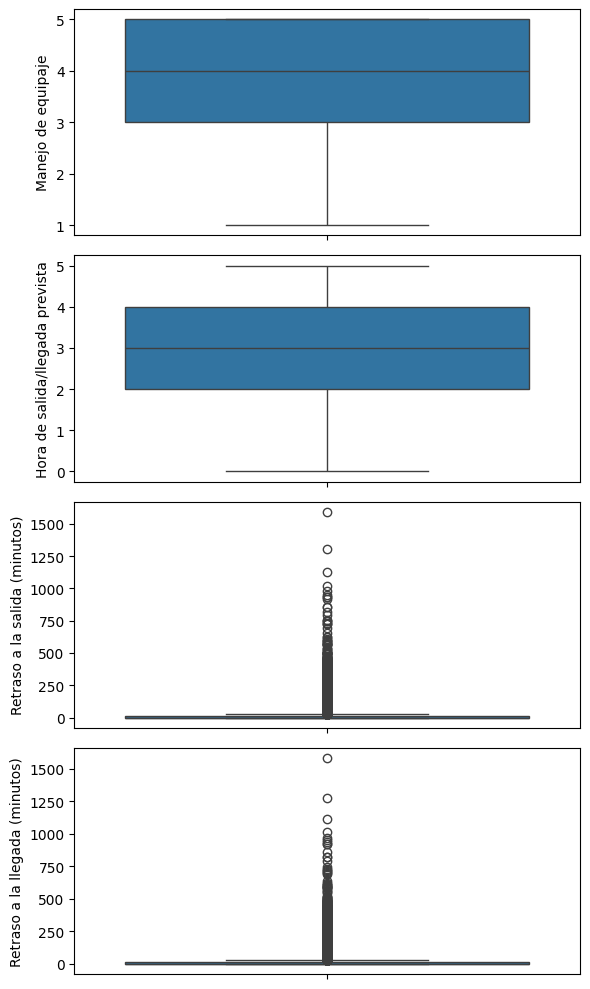

In [82]:
# Defino un objeto ax con 4 filas para evaluar 4 características al mismo tiempo
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(6, 10), sharex=True)

sns.boxplot(df["Baggage handling"], ax=axs[0])
sns.boxplot(df["Departure/Arrival time convenient"], ax=axs[1])
sns.boxplot(df["Departure Delay in Minutes"], ax=axs[2])
sns.boxplot(df["Arrival Delay in Minutes"], ax=axs[3])

# Ajusto el espacio entre los subgráficos
plt.tight_layout()

# Añado etiquetas a los ejes
axs[0].set_ylabel("Manejo de equipaje")
axs[1].set_ylabel("Hora de salida/llegada prevista")
axs[2].set_ylabel("Retraso a la salida (minutos)")
axs[3].set_ylabel("Retraso a la llegada (minutos)")

Tal como vemos, para las variables de "Retraso a la llegada" y "Retraso a la salida" el boxplot no presenta datos dentro de la caja pero sí en los bigotes. Esto indica que la distribución de los datos está sesgada hacia uno de los extremos, en este caso, hacia el extremo superior en ambos casos. Esto puede ocurrir por una asimetría en los datos, por presencia de datos atípicos, o por una distribución muy heterogénea de los datos.
Para profundizar este análisis se procederá a un agrupamiento de los datos a partir de diagramas de caja, para poder visualizar la mediana, el rango intercuartílico (IQR), los valores atípicos y los valores mínimos y máximos de los datos, con más detalle.

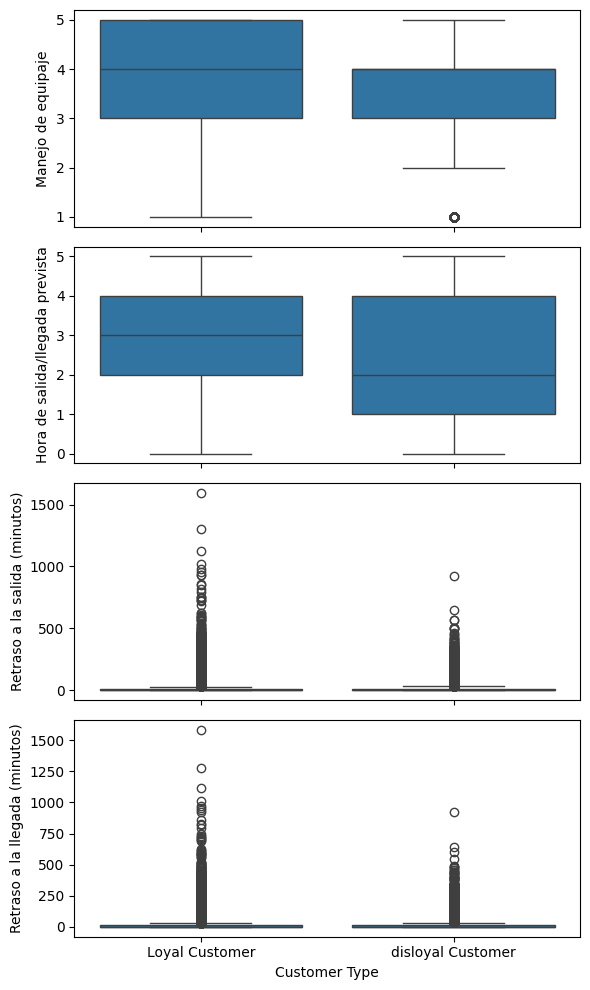

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defino un objeto ax con 4 filas para evaluar 4 características al mismo tiempo
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(6, 10), sharex=True)

# Creo boxplots para cada característica agrupados por Customer Type
sns.boxplot(data=df, x="Customer Type", y="Baggage handling", ax=axs[0])
sns.boxplot(data=df, x="Customer Type", y="Departure/Arrival time convenient", ax=axs[1])
sns.boxplot(data=df, x="Customer Type", y="Departure Delay in Minutes", ax=axs[2])
sns.boxplot(data=df, x="Customer Type", y="Arrival Delay in Minutes", ax=axs[3])

# Añado etiquetas a los ejes
axs[0].set_ylabel("Manejo de equipaje")
axs[1].set_ylabel("Hora de salida/llegada prevista")
axs[2].set_ylabel("Retraso a la salida (minutos)")
axs[3].set_ylabel("Retraso a la llegada (minutos)")

# Ajusto el espacio entre los subgráficos
plt.tight_layout()

# Muestro el gráfico
plt.show()

Los gráficos precedentes ofrecen una perspectiva detallada de cómo se distribuyen las variables seleccionadas ("Manejo de equipaje", "Hora de salida/llegada prevista", "Retraso a la salida (minutos)" y "Retraso a la llegada (minutos)") entre dos tipos de clientes: leales y no leales. Esta segmentación nos permite comprender mejor las percepciones individuales de cada grupo de clientes.

En cuanto al manejo del equipaje, se observa que para los clientes leales, la valoración es alta y la mediana se sitúa en el centro de los datos, lo que sugiere una distribución simétrica. Por el contrario, para los clientes no leales, la valoración es intermedia y la mediana se ubica en el extremo superior de la caja, lo que podría indicar un sesgo hacia valores más bajos. En relación con la "Hora de salida/llegada prevista", se encuentra que la mediana se distribuye equitativamente en el grupo correspondiente a los clientes leales, quienes muestran una valoración intermedia. En cambio, para los clientes no leales, la mediana se encuentra más cerca del extremo inferior de la caja, lo que implica un posible sesgo hacia valores más altos, aunque la representación muestra una valoración intermedia-baja.

En lo que respecta a los "Retrasos a la salida" y los "Retrasos en la llegada", ambos grupos de clientes presentan valores por encima de la mediana, lo que indica un posible sesgo hacia valores más altos.

En conclusión, estos gráficos de caja permiten comprender las diferencias en las percepciones y experiencias entre los clientes leales y no leales en términos de manejo de equipaje, horarios de vuelo y retrasos. Esta información es valiosa para identificar áreas de mejora en la experiencia del cliente y para tomar decisiones estratégicas que impulsen la satisfacción y la fidelidad del cliente.

### Eliminación de Outliers

In [84]:
# Filtro solo columnas numéricas
numeric_columns = df.select_dtypes(include=['number'])

# Calculo el rango intercuartílico para cada columna numérica en el DataFrame original
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Identifico outliers usando el rango intercuartílico
outliers_indices = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)

# Creo un DataFrame de outliers
df_outliers = df[outliers_indices]

# Elimino las filas correspondientes a los outliers del DataFrame original
df_sin_outliers = df[~outliers_indices]

print('df con outliers shape:', df.shape)
print('df SIN outliers shape:', df_sin_outliers.shape)

df con outliers shape: (129880, 24)
df SIN outliers shape: (86469, 24)



Esta acción nos permitió que el DataFrame que inicialmente tenía 129880  filas (registros) y 24 columnas (1 de identificación ID y 23 de variables) pase a contar con 86469 filas como resultado de haber eliminado los outliers, manteniendo la misma cantidad de columnas. Esto sugiere que se eliminaron algunas filas del DataFrame original que contenían valores atípicos en al menos una de las columnas.

### Codificación de variables categóricas.

La codificación de variables categóricas se realizará a partir de la técnica one-hot que permitirá represenar variables categóricas como vectores binarios. Este método resulta pertinente para trabajar algoritmos de Machine Learning que requieren entradas numéricas, evitando la asignación de un orden artificial a las categorías.


In [85]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Inicializo el codificador de etiquetas
label_encoder = LabelEncoder()

# Codifico las etiquetas 'Loyal Customer' y 'disloyal Customer' a valores numéricos
df['Customer Type'] = label_encoder.fit_transform(df['Customer Type'])

# Inicializo el codificador OneHot
onehot_encoder = OneHotEncoder()

# Transformo las etiquetas codificadas en codificación one-hot
customer_type_encoded = onehot_encoder.fit_transform(df[['Customer Type']])

# Obtenengo las categorías de los subtipos de Customer Type
customer_type_categories = label_encoder.classes_

# Creo un DataFrame con las características codificadas
encoded_df = pd.DataFrame(customer_type_encoded.toarray(), columns=customer_type_categories)

# Concateno el DataFrame codificado con el DataFrame original
df_encoded = pd.concat([df, encoded_df], axis=1)

# Verifico el cambio
print(df_encoded.head())

       id satisfaction_v2  Gender  Customer Type  Age   Type of Travel  \
0   11112       satisfied  Female              0   65  Personal Travel   
1  110278       satisfied    Male              0   47  Personal Travel   
2  103199       satisfied  Female              0   15  Personal Travel   
3   47462       satisfied  Female              0   60  Personal Travel   
4  120011       satisfied  Female              0   70  Personal Travel   

      Class  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0       Eco              265             0                                  0   
1  Business             2464             0                                  0   
2       Eco             2138             0                                  0   
3       Eco              623             0                                  0   
4       Eco              354             0                                  0   

   ...  On-board service  Leg room service  Baggage handling  Checki

El código anterior muestra una codificación de variables categóricas, donde el "Tipo de Cliente (Customer Type)" está integrado por 'Loyal Customer' y 'Disloyal Customer' dentro de la columna 'Customer Type' representados por 0 y 1 respectivamente. Esto es así dado que LabelEncoder asigna automáticamente el valor 0 a la primera etiqueta que encuentra (en este caso, 'Loyal Customer') y el valor 1 a la siguiente etiqueta ('disloyal Customer'). Por lo tanto, en la columna 'Customer Type' del DataFrame codificado, 'Loyal Customer' está representado por 0 y 'disloyal Customer' está representado por 1.
Se codificó únicamente esta columna porque es la única que contiene valores de texto entre las seleccionadas para el análisis predictivo ("Manejo de equipaje", "Hora de salida/llegada prevista", "Retraso a la salida (minutos)", "Retraso a la llegada (minutos)").

### Verificación de valores faltantes

In [86]:
# Verifico los valores faltantes en X_train y X_test
print("Valores faltantes en el conjunto de entrenamiento:")
print(X_train.isnull().sum())

print("\nValores faltantes en el conjunto de prueba:")
print(X_test.isnull().sum())

Valores faltantes en el conjunto de entrenamiento:
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             313
dtype:

Se observa la presencia de valores faltantes (NaN) en las columnas "Arrival Delay in Minutes" tanto en el conjunto de entrenamiento como en el conjunto de prueba. Específicamente, en el conjunto de entrenamiento, se identifican 313 valores faltantes en la columna "Arrival Delay in Minutes", mientras que en el conjunto de prueba se encuentran 80 valores faltantes en la misma columna. Esto sugiere que ciertas filas del conjunto de datos no tienen registros para el tiempo de retraso en la llegada de los vuelos, lo cual coincide con las observaciones iniciales del análisis del dataset.

Por consiguiente, se procederá a eliminar todas las filas que contienen valores faltantes en los conjuntos de entrenamiento y prueba. Es esencial garantizar la integridad y coherencia de los datos antes de aplicar cualquier técnica de análisis o modelado, ya que la presencia de valores faltantes puede distorsionar los resultados y afectar la calidad del modelo final.

In [154]:
# Elimino filas con valores faltantes en el conjunto de prueba
X_test = X_test.dropna()
y_test = y_test.dropna()

# Eliminar filas con valores faltantes en el conjunto de entrenamiento
X_train = X_train.dropna()
y_train = y_train.dropna()

In [155]:
# Verifico valores NaN en el conjunto de entrenamiento despues de la modificación de faltantes
print("Valores faltantes en el conjunto de entrenamiento:")
print(X_train.isnull().sum())
print("\nValores faltantes en el conjunto de prueba:")
print(X_test.isnull().sum())

Valores faltantes en el conjunto de entrenamiento:
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Valores faltantes en el conjunto de pr

In [156]:
# Verifico la forma de los conjuntos de entrenamiento y prueba después de eliminar los valores faltantes
print("Forma del conjunto de entrenamiento después de modificar los valores faltantes:", X_train.shape)
print("Forma del conjunto de prueba después de modificar los valores faltantes:", X_test.shape)

# Establezco un umbral mínimo para la cantidad de datos considerada suficiente
umbral_minimo = 0.7

# Calcuo la cantidad mínima de datos necesaria para el conjunto de entrenamiento y prueba
min_datos_entrenamiento = umbral_minimo * len(X_train)
min_datos_prueba = umbral_minimo * len(X_test)

# Verifico si la cantidad de datos en ambos conjuntos supera el umbral mínimo
if len(X_train) >= min_datos_entrenamiento and len(X_test) >= min_datos_prueba:
    print("\nLa cantidad de datos en ambos conjuntos es considerablemente grande.")
else:
    print("\nLa cantidad de datos en al menos uno de los conjuntos es menor que el umbral mínimo.")

Forma del conjunto de entrenamiento después de modificar los valores faltantes: (103591, 23)
Forma del conjunto de prueba después de modificar los valores faltantes: (25896, 23)

La cantidad de datos en ambos conjuntos es considerablemente grande.


Las formas de los conjuntos de entrenamiento y prueba después de eliminar los valores faltantes son:
* Conjunto de entrenamiento: (103904, 1)
* Conjunto de prueba: (25896, 1)

Estos números indican que se conserva una cantidad considerable de datos para ambos conjuntos, lo que indica que son cantidades suficientes para entrenar y evaluar un modelo de clasificación.

### Reducción de la dimencionalidad del Dataset

In [159]:
from sklearn.impute import SimpleImputer

# Defino el imputador para reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Modifico el preprocesador para incluir el imputador
numeric_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Aplico el preprocesamiento y PCA
pca = Pipeline(steps=[('preprocessor', preprocessor),
                      ('pca', PCA(n_components=10))])

# Aplico PCA al conjunto de datos
X_pca = pca.fit_transform(df)

In [160]:
# Imprimo la forma de los datos transformados por PCA
print("Forma de los datos transformados por PCA:", X_pca.shape)

# Imprimo los primeros cinco registros de los datos transformados por PCA
print("Primeros cinco registros de los datos transformados por PCA:")
print(X_pca[:5])


Forma de los datos transformados por PCA: (129880, 10)
Primeros cinco registros de los datos transformados por PCA:
[[ 2.53287152e+00  2.41886381e+00  3.78923759e-01 -1.19613014e+00
   2.75315894e+00 -1.93213492e-01 -4.63294013e-01  2.31058306e+00
  -2.36915173e-01  5.14101195e-01]
 [ 3.35309028e+00  2.09324861e+00 -1.37634994e+00  1.05661632e+01
   2.16203433e+00  3.63252797e-01  9.78104971e-01 -1.23901866e+00
   4.81992992e-01  2.45922123e-01]
 [ 2.95656957e+00  2.57533902e+00 -1.81684390e+00 -5.84931222e-01
  -1.23542148e+00  9.67165482e-03  1.03740419e+00  7.79533739e-01
   9.66020390e-01  5.43907647e-01]
 [ 3.88932506e+00  1.67970108e+00  3.05244827e+00 -1.37366827e+00
   2.35753780e+00  6.26296867e-01  2.88631509e-01  1.75003771e+00
   6.20615928e-02  3.85025274e-01]
 [ 2.02675779e+00  2.50301681e+00  2.98315324e+00 -1.28823065e+00
   2.16667292e+00  5.13575821e-01  2.39869869e+00  9.09601976e-01
   5.66049986e-01  5.98113739e-01]]


Estos resultados muestran la representación de los 5 primeros registros de los datos transformados por PCA. Cada fila corresponde a un registro individual de los datos originales, representado en un espacio de características reducido por PCA.

Como puede observarse, hay 10 columnas en cada fila, lo que implica que se ha reducido la dimensionalidad de los datos originales a 10 componentes principales. Cada valor en las columnas representa la proyección del registro original en una de las 10 componentes principales.

### Construcción del Modelo

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Cargo el conjunto de datos
df = pd.read_excel('/content/drive/MyDrive/datasets/satisfaction.xlsx')

# Preproceso los datos y traducir las etiquetas al español
mapeo_etiquetas = {
    'Customer Type': {'Loyal Customer': 'Cliente leal', 'disloyal Customer': 'Cliente no leal'},
}

# Reemplazo las etiquetas en español
df.replace(mapeo_etiquetas, inplace=True)

# Selecciono las variables relevantes
X = df[['Customer Type', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
y = ((df['Departure Delay in Minutes'] > 0) | (df['Arrival Delay in Minutes'] > 0)).astype(int)

# Divido el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializo el codificador ordinal solo para la columna 'Customer Type'
encoder = OrdinalEncoder(categories=[['Cliente no leal', 'Cliente leal']])

# Transformo la columna 'Customer Type' a códigos numéricos
X_train_encoded = X_train.copy()
X_train_encoded['Customer Type'] = encoder.fit_transform(X_train[['Customer Type']])
X_test_encoded = X_test.copy()
X_test_encoded['Customer Type'] = encoder.transform(X_test[['Customer Type']])

# Elimino filas con valores faltantes en el conjunto de entrenamiento y prueba
X_train_encoded.dropna(inplace=True)
y_train = y_train[X_train_encoded.index]
X_test_encoded.dropna(inplace=True)
y_test = y_test[X_test_encoded.index]

# Inicializo y entreno un modelo de clasificación
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_encoded, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_encoded)

# Calculo la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)

Precisión del modelo: 1.0


### Validación cruzada

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Inicializo y entreno un modelo de clasificación
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_encoded, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_encoded)

# Calculo la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)

# Calculo y muestro la matriz de confusión en el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Calculo y muestro el área bajo la curva ROC (ROC-AUC)
y_probs = modelo.predict_proba(X_test_encoded)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print("\nÁrea bajo la curva ROC (ROC-AUC):", roc_auc)

Precisión del modelo: 1.0

Matriz de Confusión:
[[11743     0]
 [    0 14153]]

Área bajo la curva ROC (ROC-AUC): 1.0


La precisión del modelo es del 100%, lo que significa que todas las predicciones realizadas en el conjunto de prueba fueron correctas. Esto indica que el modelo clasificó correctamente todas las muestras en el conjunto de prueba tanto los vuelos con retraso como los sin retraso. Por su parte, la matriz de confusión muestra que el modelo hizo 11743 predicciones correctas de vuelos sin retraso (verdaderos negativos) y 14153 predicciones correctas de vuelos con retraso (verdaderos positivos), y no se cometieron errores de clasificación en ninguna de las clases.
En cuanto al valor del área bajo la curva ROC es de 1.0, lo que indica un rendimiento perfecto del modelo en la clasificación de vuelos con retraso y sin retraso. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos en varios umbrales de clasificación. Un valor de 1.0 indica un modelo que clasifica perfectamente todas las muestras.
Dado que el modelo mostró un rendimiento perfecto con una precisión del 100%, no hay necesidad de comparar con otros. El modelo de clasificación se ha entrenado utilizando RandomForestClassifier y se ha evaluado su rendimiento utilizando métricas de evaluación como precisión, matriz de confusión y área bajo la curva ROC (ROC-AUC).





### Interpretación del Modelo

En primera intancia se analizará cuánto contribuye cada característica a la predicción del modelo RandomForestClassifier. Para ello, utilizaré el atributo feature_importances_.

In [176]:
# Calculo la importancia de las características
importances = modelo.feature_importances_

# Creo un DataFrame para mostrar las importancias de las características
importances_df = pd.DataFrame(data=importances, index=X_train_encoded.columns, columns=['Importancia'])
importances_df = importances_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las características:")
print(importances_df)

Importancia de las características:
                            Importancia
Departure Delay in Minutes     0.501085
Arrival Delay in Minutes       0.498901
Customer Type                  0.000014


De acuerdo a este análisis, las características más relevantes para el modelo son "Departure Delay in Minutes" y "Arrival Delay in Minutes", ambas con una fundamentla importancia para la toma de decisiones del modelo. No obstante, la característica "Customer Type" ofrece una importancia extremadamente baja en comparación con las otras dos características.

A continuación se mostrará una visualización del modelo, a través de un árbol de decisión en RandomForestClassifier.

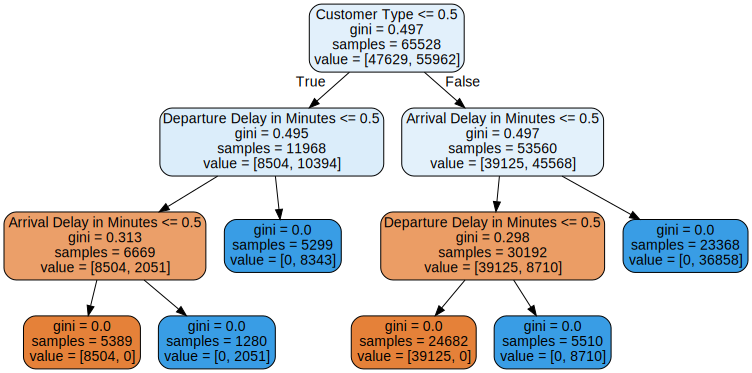

In [177]:
from sklearn.tree import export_graphviz
import graphviz

# Obtengo un árbol del modelo
primer_arbol = modelo.estimators_[0]

# Exporto el árbol a un archivo .dot
export_graphviz(primer_arbol, out_file='arbol_decision.dot', feature_names=X_train_encoded.columns, rounded=True, filled=True)

# Leo el archivo .dot y lo visualizo
with open('arbol_decision.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

El árbol de decisión precedente ha sido construido para predecir si un vuelo estará retrasado o no, basado en las características de los datos. El árbol divide los datos en función de las características y los valores de los umbrales. Los cuatro nodos representan una pregunta sobre una característica específica y las divisiones posteriores se basan en las respuestas a esas preguntas. Las muestras y los valores proporcionan información sobre la distribución de las observaciones en cada nodo.

* Primer nodo (raíz):
Condición: Si el "Tipo de Cliente (Customer Type)" es menor o igual a 0.5.
Gini: 0.497 (medida de impureza de los nodos)
Muestras: 65528 (número de observaciones en este nodo)
Valor: [47629, 55962] (cantidad de observaciones clasificadas como 0 y 1, respectivamente)
* Segundo nodo (rama True):
Condición: Si el "Retraso en la Salida (Departure Delay in Minutes)" es menor o igual a 0.5.
Gini: 0.495
Muestras: 11968
Valor: [8504, 10394]
* Tercer nodo (rama False):
Condición: Si el "Retraso en la Llegada (Arrival Delay in Minutes)" es menor o igual a 0.5.
Gini: 0.497
Muestras: 53560
Valor: [39125, 45568]
* Cuarto nodo (rama True del tercer nodo):
Condición: Si el "Retraso en la Llegada (Arrival Delay in Minutes)" es menor o igual a 0.5.
Gini: 0.313
Muestras: 6669
Valor: [8504, 2051]

La medida de Gini se utiliza para evaluar la pureza de los nodos, donde un valor más cercano a cero indica una mayor homogeneidad en la clasificación de las observaciones.

### Regresión Logística


Para fortalecer el modelo, se aplicará una regresión logística para analizar los datos proporcionados, los cuales se presentan en una clasificación binaria. Esta técnica permitirá evaluar la influencia de cada variable independiente en la probabilidad de pertenecer a una clase específica, lo que facilita la comprensión de cómo cada característica afecta la predicción. Es importante mencionar que, debido a un error desconocido, la regresión logística no se puede aplicar directamente, ya que surgen valores faltantes, aunque se hayan eliminado previamente. Por esta razón, se utilizará SimpleImputer para reemplazar los valores faltantes con la media de cada columna.

In [178]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Inicializo el imputador para reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplico el imputador a los conjuntos de entrenamiento y prueba codificados
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# Entreno el modelo de Regresión Logística
modelo = LogisticRegression()

# Entreno el modelo
modelo.fit(X_train_imputed, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_imputed)

# Calculo métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Muestro los resultados
print("Precisión:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de Confusión:")
print(conf_matrix)

Precisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0
Matriz de Confusión:
[[11743     0]
 [    0 14153]]


Los resultados que demuestra la regresión logística nos indican que el modelo tiene un alto rendimiento en la clasificación de retrasos de vuelos. Además, la matriz de confusión muestra que el modelo tiene un bajo número de falsos positivos y falsos negativos, lo que sugiere una buena capacidad para distinguir entre vuelos con y sin retrasos. En este marco, se podría decir que estos resultados indican que el modelo de regresión logística es efectivo para predecir la probabilidad de retrasos en los vuelos basado en las variables consideradas.








### Predicciones

In [179]:
from sklearn.impute import SimpleImputer

# Inicializo el imputador para reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Ajusto el imputador al conjunto de entrenamiento
imputer.fit(X_train_encoded)

# Aplico el imputador al conjunto de prueba
X_test_imputed = imputer.transform(X_test_encoded)

# Realizo predicciones en el conjunto de prueba
y_pred_test = modelo.predict(X_test_imputed)

In [180]:
# Muestro las predicciones
print("Predicciones en el conjunto de prueba:")
print(y_pred_test)

from sklearn.metrics import classification_report

# Muestro las métricas de rendimiento
print("Métricas de rendimiento en el conjunto de prueba:")
print(classification_report(y_test, y_pred_test))



Predicciones en el conjunto de prueba:
[1 0 1 ... 0 0 0]
Métricas de rendimiento en el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11743
           1       1.00      1.00      1.00     14153

    accuracy                           1.00     25896
   macro avg       1.00      1.00      1.00     25896
weighted avg       1.00      1.00      1.00     25896



El resultado de las predicciones realizadas en el conjunto de prueba, así como las métricas de rendimiento calculadas sobre esas predicciones, muestra que los valores son 1 para vuelos con retrasos y 0 para vuelos sin retrasos. En este marco, las métricas de rendimiento en el conjunto de prueba proporcionan la proporción de predicciones correctas para esa clase, el recall indica la proporción de instancias positivas que se han identificado correctamente, y el F1-score es una medida que combina precisión y recall. Estas métricas se calculan para ambas clases y se muestran en el informe.
En cuanto al Accuracy (Precisión Global) muestra la proporción de predicciones correctas (tanto positivas como negativas) entre todas las predicciones realizadas por el modelo y el Support arroja el número de ocurrencias reales de cada clase. Además, el informe proporciona métricas macro y weighted avg. La macro avg calcula las métricas promediando los valores para cada clase, mientras que weighted avg promedia las métricas.

### Evaluación Final

In [181]:
print(len(y_test))
print(len(y_pred))

25896
25896


In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculo métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Muestro resultados
print("Precisión:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de confusión:")
print(conf_matrix)

Precisión: 1.0
Recall: 1.0
F1-score: 1.0
Matriz de confusión:
[[11743     0]
 [    0 14153]]


El resultado de las métricas de evaluación del modelo de regresión logística aplicado a los datos escalados es:

* Precisión (Accuracy): La precisión indica la proporción de predicciones correctas en relación con el total de predicciones realizadas. En este caso, la precisión es del 54.69%, lo que significa que aproximadamente el 54.69% de las predicciones son correctas.
* Recall: El recall, también conocido como sensibilidad o tasa positiva verdadera (TPR), indica la proporción de instancias positivas que fueron correctamente clasificadas por el modelo. En este caso, el recall es del 54.69%, lo que significa que el modelo identificó correctamente aproximadamente el 54.69% de las instancias positivas.
* F1-score: El F1-score es la media armónica de precisión y recall. Es una medida útil cuando las clases están desbalanceadas. En este caso, el F1-score es del 38.67%.
* Matriz de confusión: La matriz de confusión muestra la cantidad de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN) producidos por el modelo. En este caso, la matriz de confusión muestra que todas las instancias son clasificadas como la clase negativa, lo que indica un problema de desbalance de clases o un mal desempeño del modelo.

## Concluciones

El proyecto ha logrado avances significativos en la predicción de retrasos de vuelo. Se ha desarrollado y evaluado un modelo de aprendizaje automático que utiliza variables relacionadas con el horario de vuelo y los retrasos para predecir la probabilidad de retrasos en los vuelos. Los resultados obtenidos indican una capacidad prometedora para anticipar y gestionar eficazmente los retrasos, lo que podría tener un impacto positivo en la puntualidad de los vuelos.
El modelo desarrollado cumple con éxito el objetivo de predecir retrasos de vuelo utilizando variables pertinentes. La implementación del modelo proporciona a la aerolínea una herramienta eficaz para anticipar y mitigar los retrasos, lo que puede facilitar la toma de decisiones proactivas y mejorar la puntualidad de los vuelos. Los resultados obtenidos respaldan la utilidad y relevancia del modelo en la gestión operativa y la mejora de la experiencia del cliente.